In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [197]:
{
    1: "prare data and load",
    2: "build a model",
    3: "fit the model to the data",
    4: "Saving and loading the model",
    5: 'Putting it all together'
}

{1: 'prare data and load',
 2: 'build a model',
 3: 'fit the model to the data',
 4: 'Saving and loading the model',
 5: 'Putting it all together'}

In [198]:
torch.__version__

'2.7.1+cpu'

# 1

In [199]:
weight = 0.7
bias = 0.3

In [200]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)


In [201]:
y = weight *X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [202]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


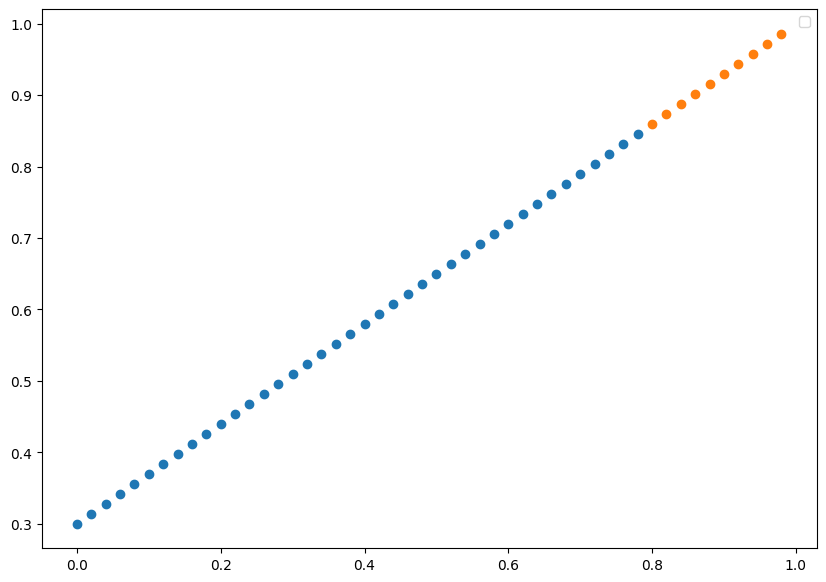

In [203]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels)
    plt.scatter(test_data,test_labels)
    if predictions is not None:
        plt.scatter(test_data,predictions)
    plt.legend()
    
plot_predictions()

# 2

In [204]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x):
            return self.weights * x + self.bias


In [205]:
torch.manual_seed(42)
model_0 = LinearModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [206]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [207]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


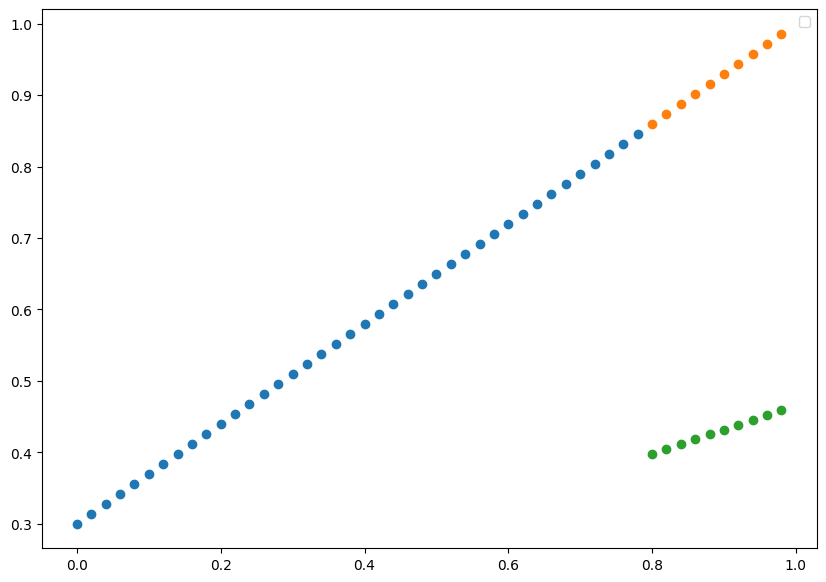

In [208]:
plot_predictions(predictions=y_preds)

# 3

In [209]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [210]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for i in range(epochs):

    model_0.train()

    y_preds = model_0(X_train)
    loss = loss_fn(y_train,y_preds)
    # print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if i % 10 == 0:
        epoch_count.append(i)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {i} | Loss : {loss} | Test Loss : {test_loss}")
        print(model_0.state_dict())


Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

In [211]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

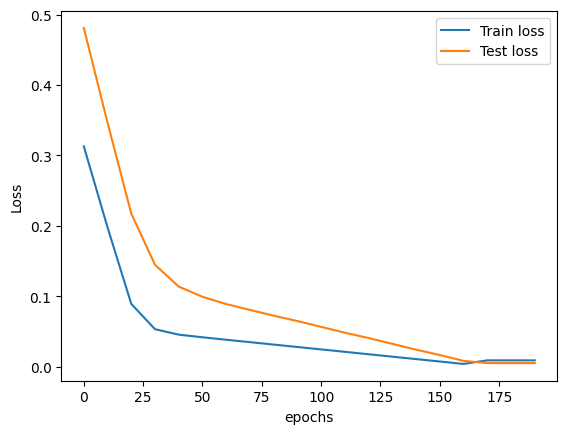

In [212]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label='Train loss')
plt.plot(epoch_count,test_loss_values,label='Test loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


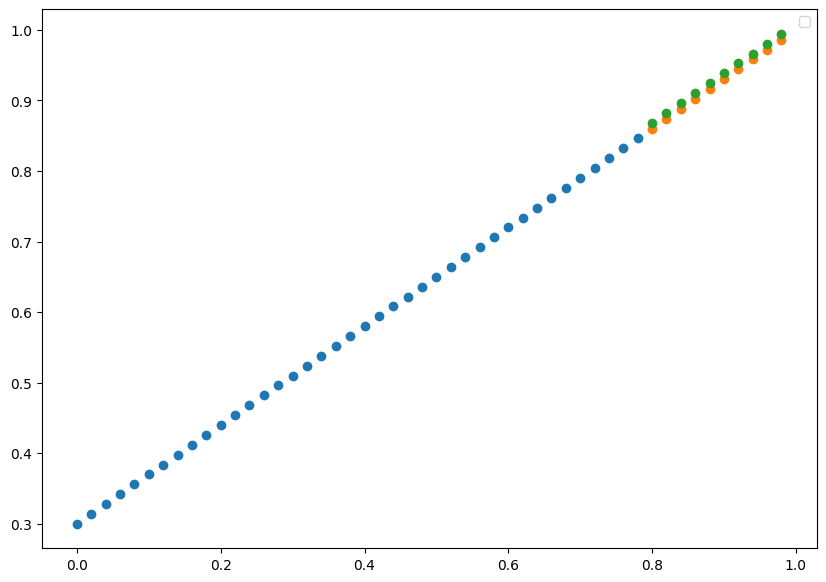

In [213]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

# 4

In [214]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_linear_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_linear_model.pth


In [215]:
loaded_model_0 = LinearModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [216]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [217]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [218]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 5

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
weight = -0.5
bias = -0.9

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
X.to(device=device)
y = X * weight + bias

split = int(len(X)*0.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_test)

(40, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


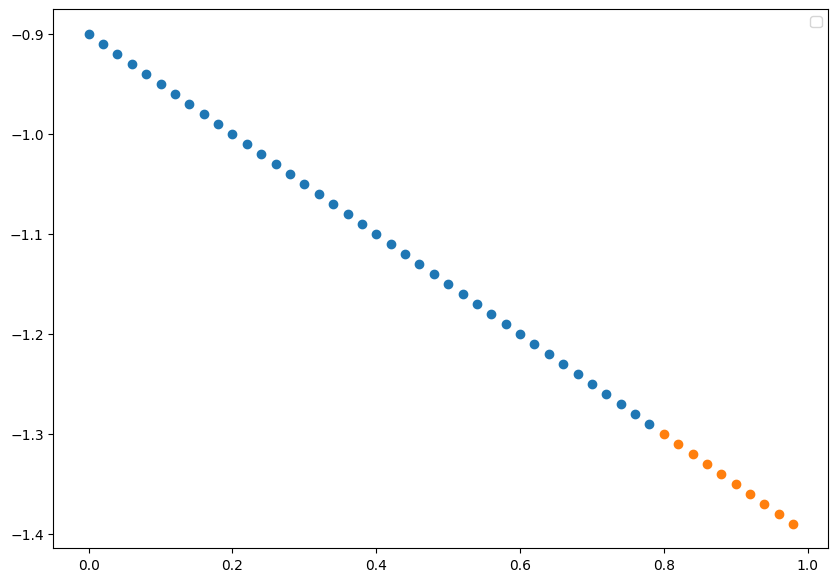

In [4]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels)
    plt.scatter(test_data,test_labels)
    if predictions is not None:
        plt.scatter(test_data,predictions)
    plt.legend()
    
plot_predictions()

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x):
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.to(device=device)
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [6]:
next(model_1.parameters()).device

device(type='cpu')

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [8]:
torch.manual_seed(42)
epochs = 500
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if epoch%10 == 0:
        print(f"Epoch : {epoch} | train loss : {loss} | test loss : {test_loss}")


Epoch : 0 | train loss : 2.223177909851074 | test loss : 2.8419764041900635
Epoch : 10 | train loss : 2.1079680919647217 | test loss : 2.707266330718994
Epoch : 20 | train loss : 1.9927583932876587 | test loss : 2.572556734085083
Epoch : 30 | train loss : 1.8775484561920166 | test loss : 2.4378466606140137
Epoch : 40 | train loss : 1.762338638305664 | test loss : 2.3031368255615234
Epoch : 50 | train loss : 1.647128701210022 | test loss : 2.168426752090454
Epoch : 60 | train loss : 1.5319187641143799 | test loss : 2.033716917037964
Epoch : 70 | train loss : 1.4167085886001587 | test loss : 1.8990072011947632
Epoch : 80 | train loss : 1.3014986515045166 | test loss : 1.7642972469329834
Epoch : 90 | train loss : 1.1862887144088745 | test loss : 1.6295874118804932
Epoch : 100 | train loss : 1.0710786581039429 | test loss : 1.4948774576187134
Epoch : 110 | train loss : 0.9558687210083008 | test loss : 1.3601676225662231
Epoch : 120 | train loss : 0.8406588435173035 | test loss : 1.22545778

In [9]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4936]])),
             ('linear_layer.bias', tensor([-0.8985]))])

In [10]:
weight, bias

(-0.5, -0.9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


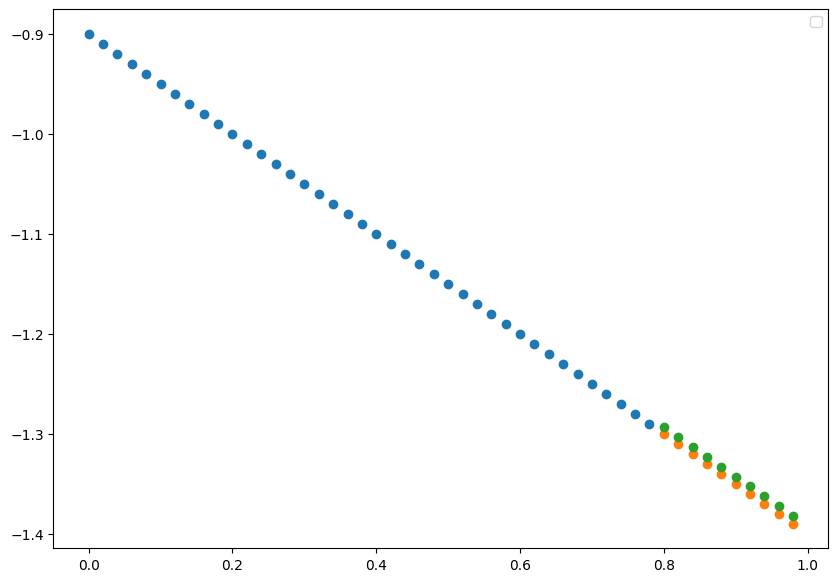

In [11]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test)
plot_predictions(predictions=y_pred)

In [14]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_linear_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_linear_model_1.pth


In [16]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH)) 
loaded_model_1.to(device=device)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4936]])),
             ('linear_layer.bias', tensor([-0.8985]))])